In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('Mall_Customers.csv',index_col=0)

In [3]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [5]:
df.Genre.replace(["Male", "Female"], [0,1], inplace = True)

In [6]:
df.head()

,Genre,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


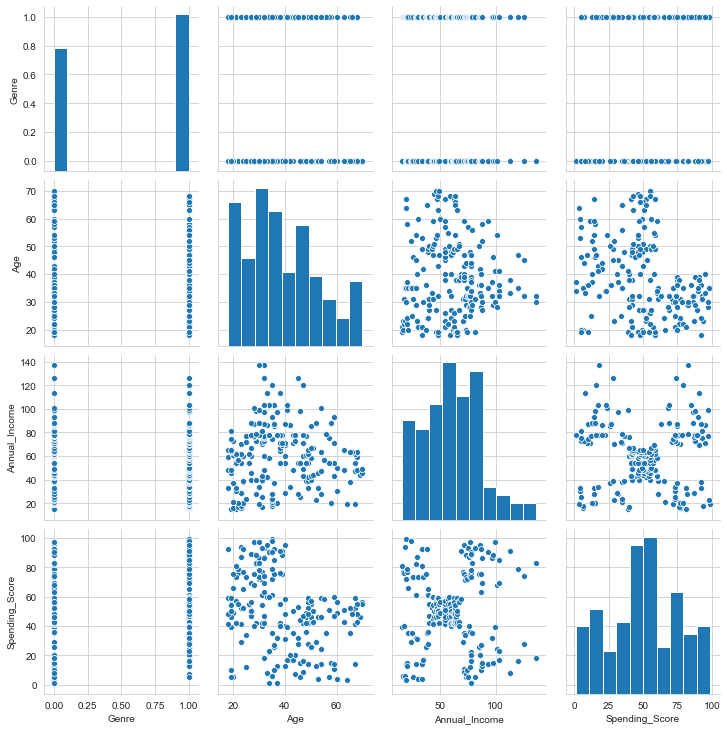

In [7]:
sns.set_style('whitegrid')
sns.pairplot(df)

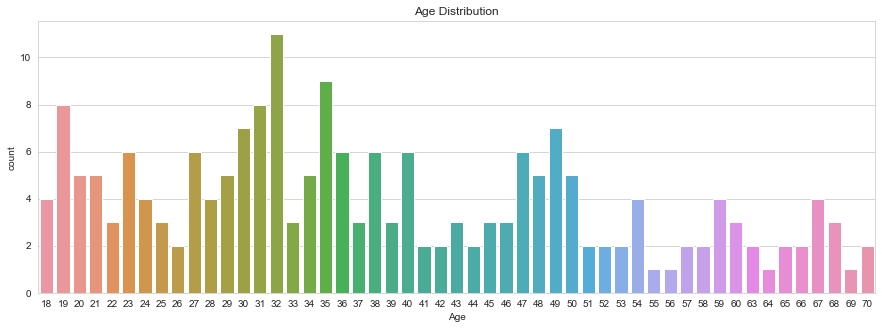

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

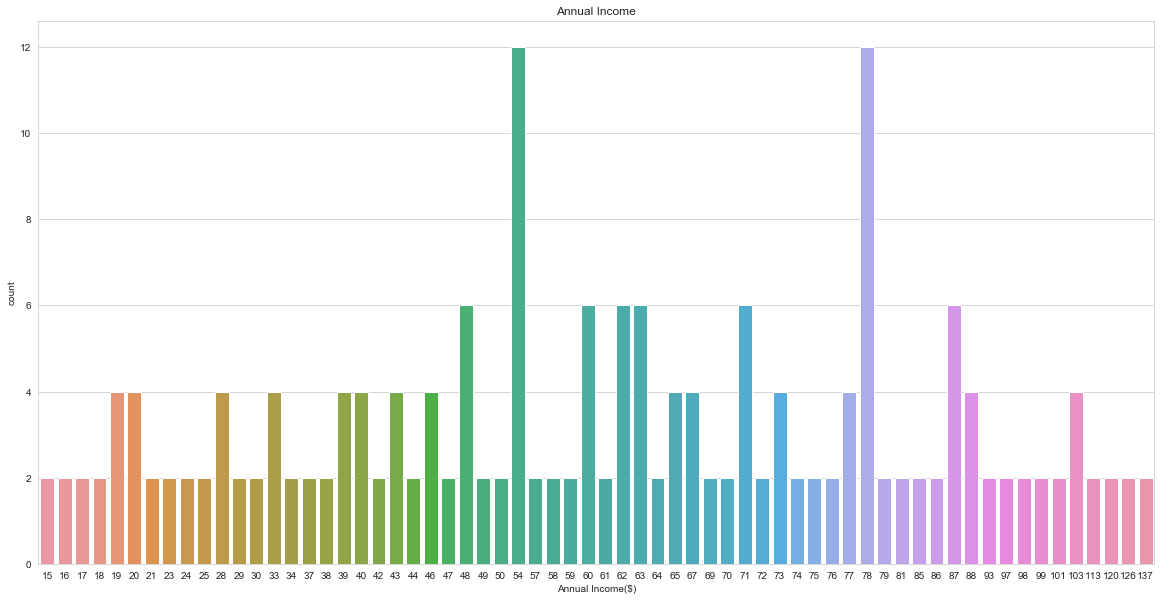

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(df['Annual_Income'])
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show()

Text(0, 0.5, 'Count')

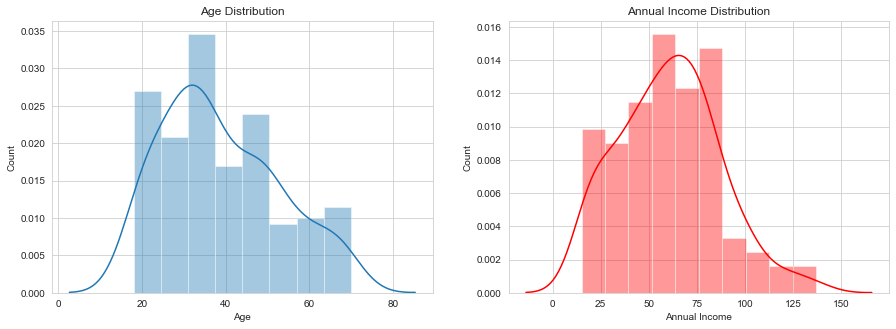

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.distplot(df['Annual_Income'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

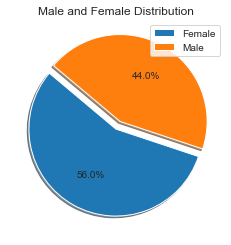

In [11]:
explode = [0,0.1]
plt.pie(df['Genre'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

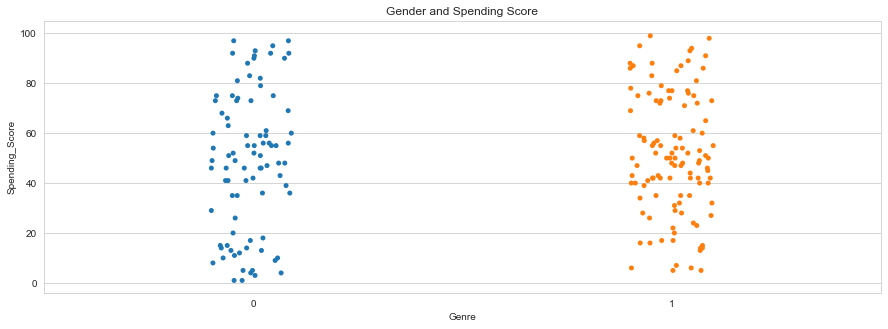

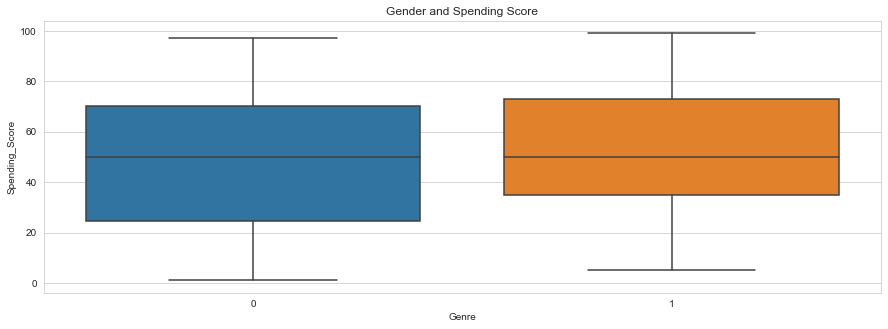

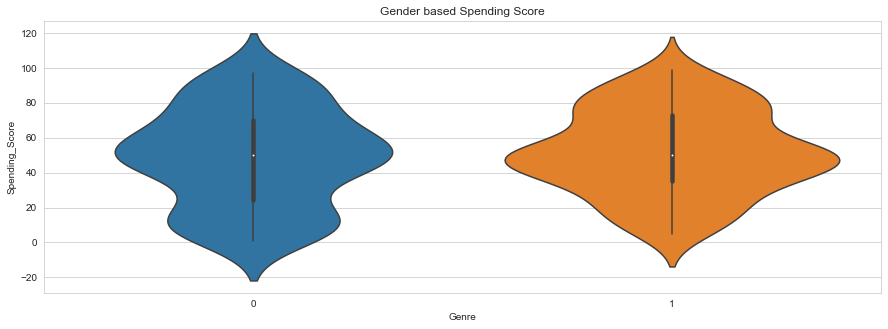

In [12]:
plt.figure(figsize=(15,5))
sns.stripplot(df['Genre'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(df['Genre'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.violinplot(df['Genre'],df['Spending_Score'])
plt.title('Gender based Spending Score')
plt.show()

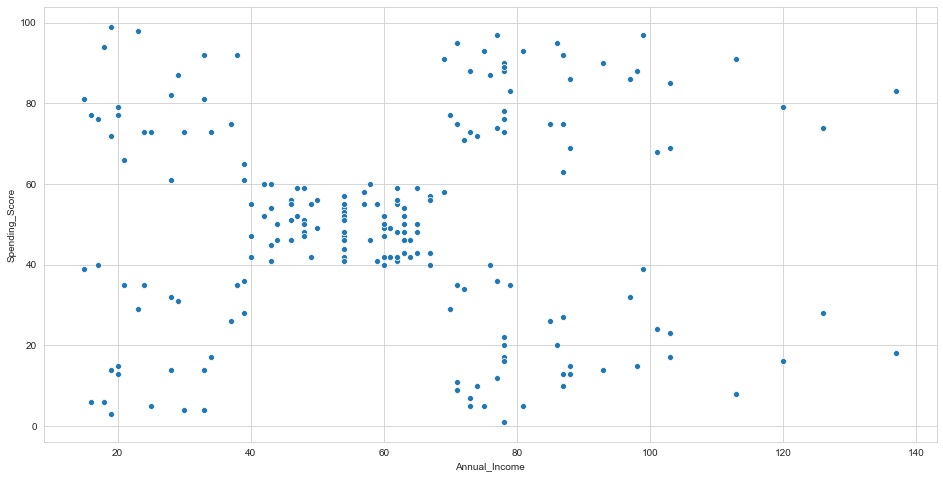

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df['Annual_Income'], df['Spending_Score'], ax=ax)
plt.show()

In [14]:
from pyclustertend import hopkins

In [15]:
hopkins(df,df.shape[0])

0.31331526353028333

In [16]:
df

,Genre,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40
...,...,...,...,...
196,1,35,120,79
197,1,45,126,28
198,0,32,126,74


In [17]:
x1 = df[['Age','Spending_Score']]

In [18]:
x1

,Age,Spending_Score
CustomerID,,
1,19,39
2,21,81
3,20,6
4,23,77
5,31,40
...,...,...
196,35,79
197,45,28
198,32,74


In [19]:
hopkins(x1,x1.shape[0])

0.2947201907611456

In [20]:
from sklearn.cluster import KMeans

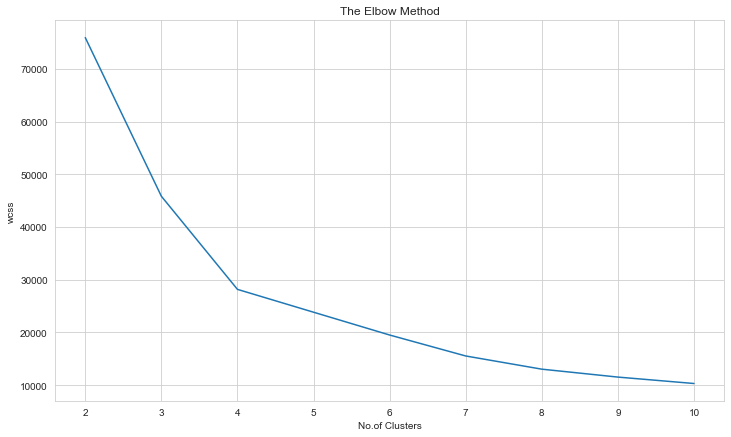

In [21]:
wcss=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,7))
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('wcss')
plt.show()

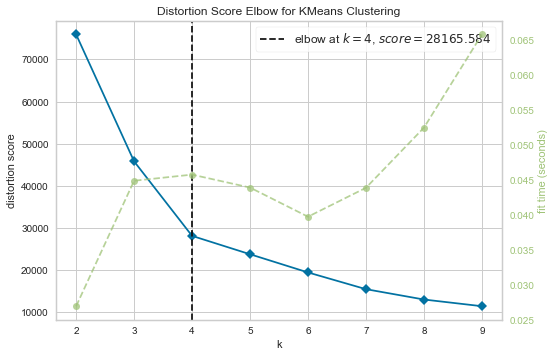

In [22]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x1)
visu.poof();

In [23]:
kmeans = KMeans(n_clusters = 4)

In [24]:
y_means = kmeans.fit(x1)

In [25]:
kmeans.fit_predict(x1)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [26]:
x1['clusters_kmean'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
x1

,Age,Spending_Score,clusters_kmean
CustomerID,,,
1,19,39,3
2,21,81,1
3,20,6,2
4,23,77,1
5,31,40,3
...,...,...,...
196,35,79,1
197,45,28,2
198,32,74,1


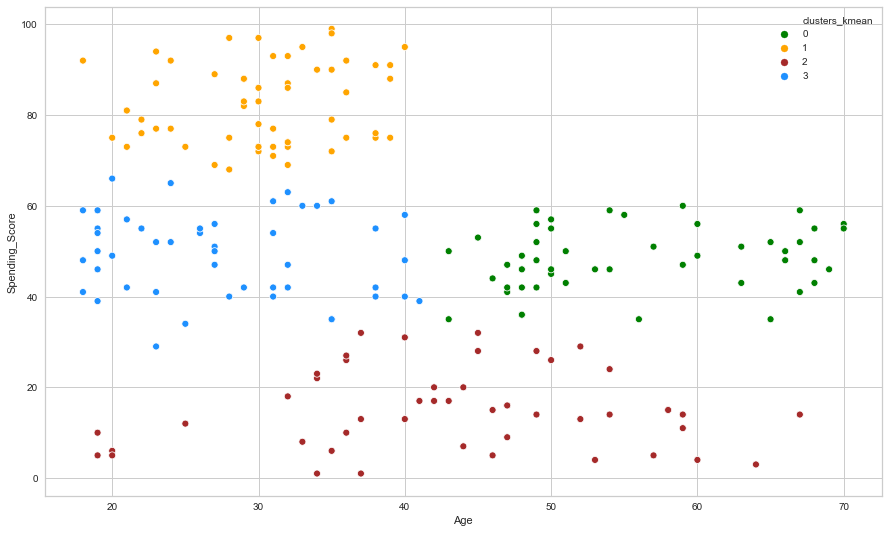

In [28]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='clusters_kmean', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

In [29]:
x2 = df[['Annual_Income','Spending_Score']]

In [30]:
from pyclustertend import hopkins

In [31]:
hopkins(x2,x2.shape[0])

0.31145478275516525

In [32]:
from sklearn.cluster import KMeans

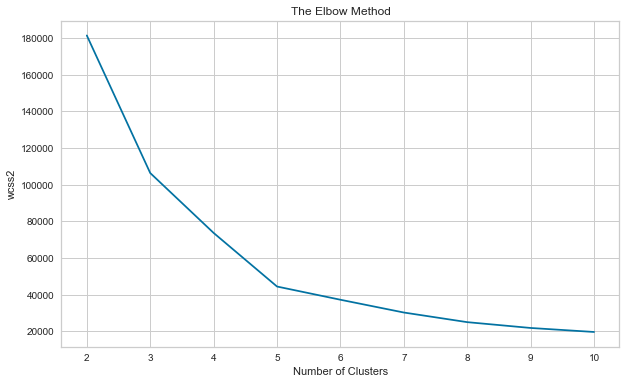

In [33]:
wcss2 = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x2)
    wcss2.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), wcss2)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss2')
plt.show()

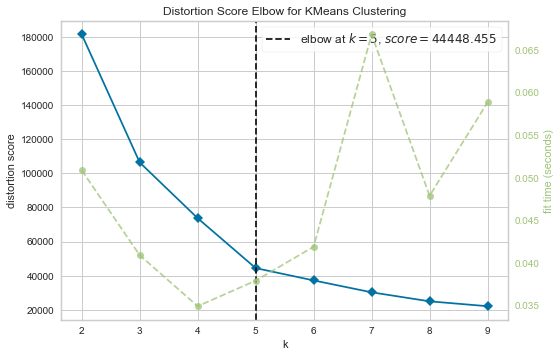

In [34]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x2)
visu.poof()

In [35]:
kmeansmodel = KMeans(n_clusters = 5)

In [36]:
kmeansmodel.fit(x2)

KMeans(n_clusters=5)

In [37]:
kmeansmodel.fit_predict(x2)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [38]:
x2['clusters'] = kmeansmodel.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
x2

,Annual_Income,Spending_Score,clusters
CustomerID,,,
1,15,39,3
2,15,81,0
3,16,6,3
4,16,77,0
5,17,40,3
...,...,...,...
196,120,79,2
197,126,28,1
198,126,74,2


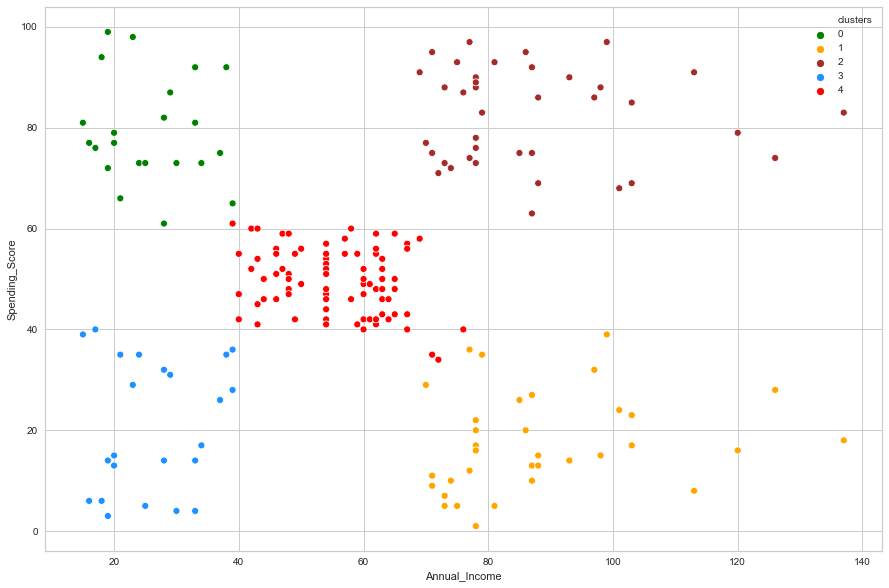

In [40]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual_Income',y='Spending_Score', hue='clusters',data=x2,palette=['green','orange','brown','dodgerblue','red'],legend='full')

Hierarchial Clustering

In [41]:
from scipy.cluster.hierarchy import linkage 

In [42]:
hc_complete = linkage(x1, "complete")
hc_ward = linkage(x1, "ward")

In [43]:
from scipy.cluster.hierarchy import dendrogram

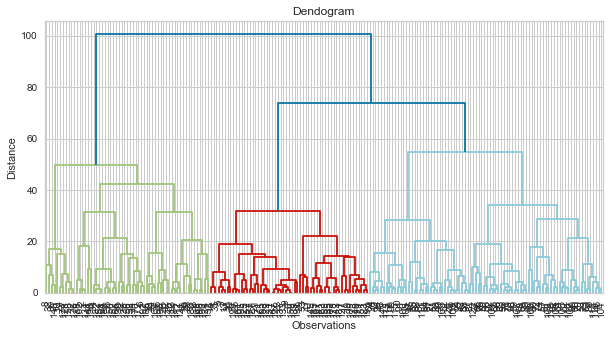

In [44]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

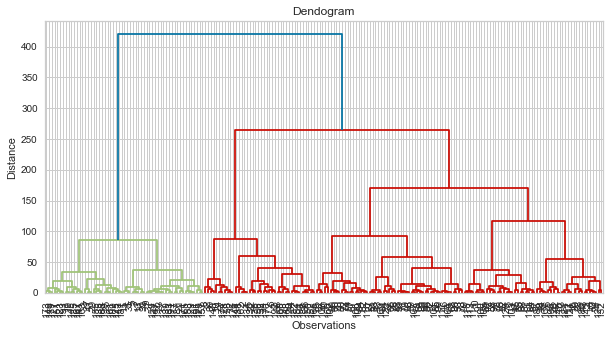

In [45]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
          leaf_font_size = 10);

for x2

In [46]:
hc_complete = linkage(x2, "complete")
hc_ward = linkage(x2, "ward")

In [47]:
from scipy.cluster.hierarchy import dendrogram

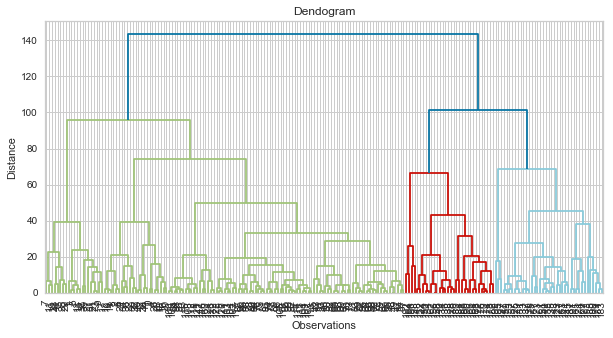

In [48]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
          leaf_font_size = 10);

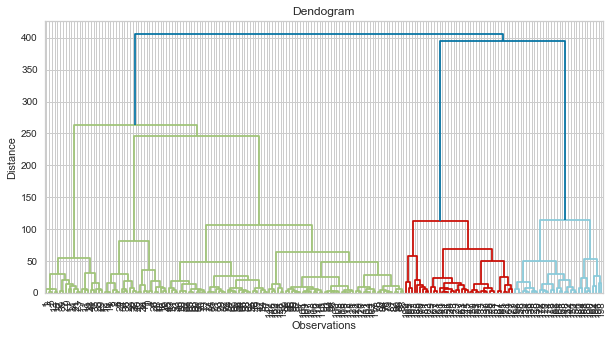

In [49]:
plt.figure(figsize = (10,5))
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
          leaf_font_size = 10);

In [50]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg = cluster.fit_predict(x1)

In [51]:
x1['cluster_Hierar'] = y_agg

In [52]:
x1

,Age,Spending_Score,clusters_kmean,cluster_Hierar
CustomerID,,,,
1,19,39,3,0
2,21,81,1,3
3,20,6,2,2
4,23,77,1,3
5,31,40,3,0
...,...,...,...,...
196,35,79,1,3
197,45,28,2,0
198,32,74,1,3


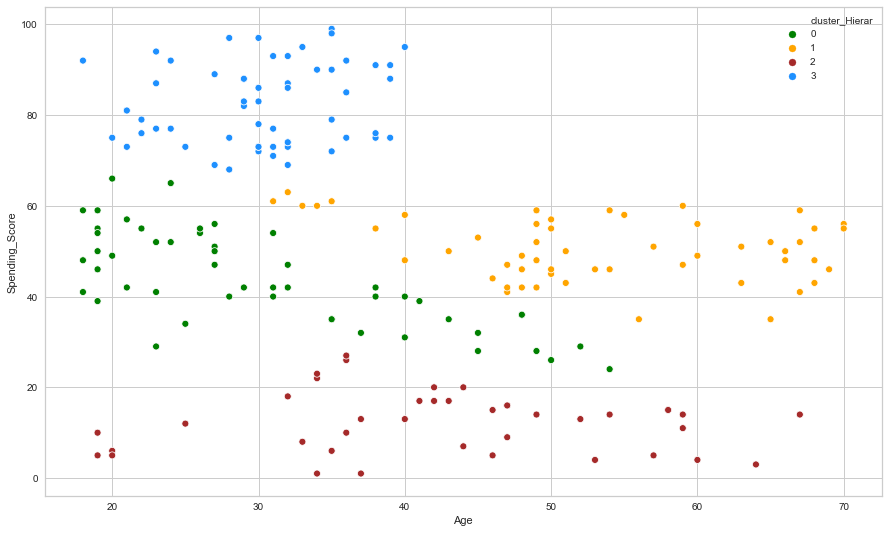

In [53]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Hierar', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

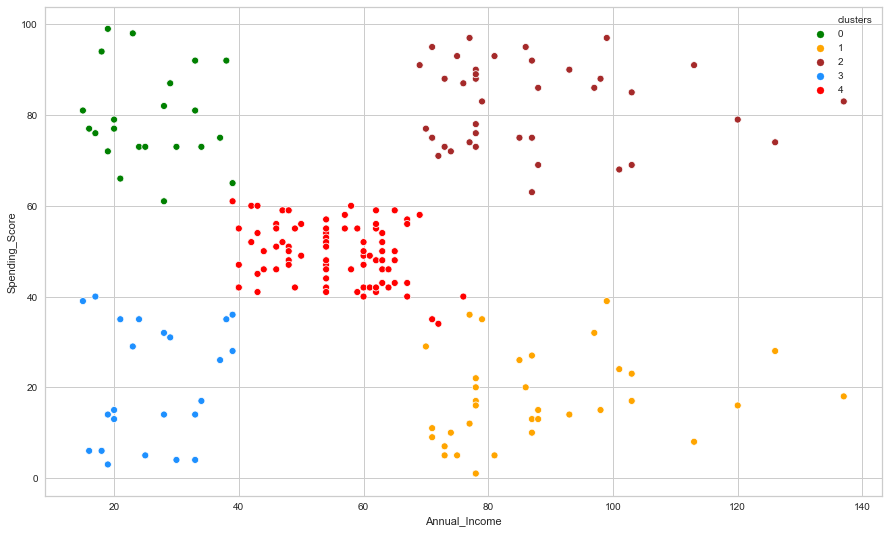

In [54]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='clusters', data=x2,palette=['green','orange','brown','dodgerblue','red'])

In [58]:
df['clusters'] = x2.clusters
df

,Genre,Age,Annual_Income,Spending_Score,clusters
CustomerID,,,,,
1,0,19,15,39,3
2,0,21,15,81,0
3,1,20,16,6,3
4,1,23,16,77,0
5,1,31,17,40,3
...,...,...,...,...,...
196,1,35,120,79,2
197,1,45,126,28,1
198,0,32,126,74,2


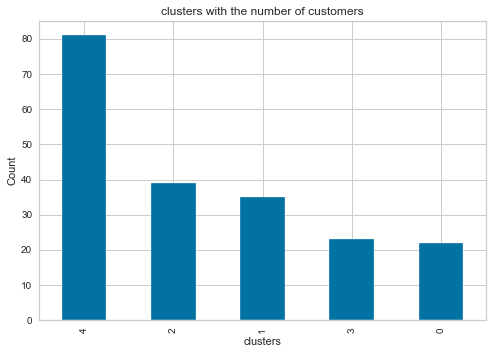

In [61]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
df.clusters.value_counts().plot(kind='bar')

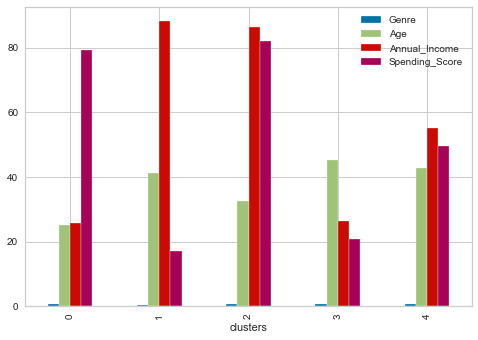

In [62]:
df.groupby(df.clusters).mean().plot(kind='bar')
plt.show()

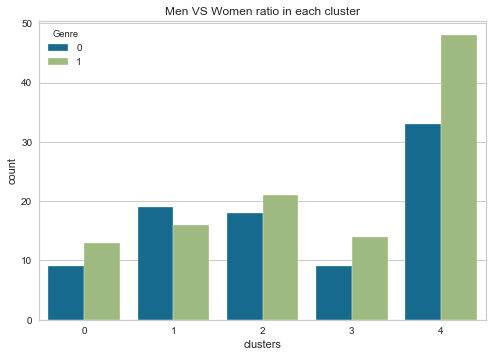

In [63]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
sns.countplot(x=df.clusters, hue=df.Genre)
plt.show()